In [ ]:
# Next steps:

# 1. save the model as pkl so i wont need to train it every time
# 2. change the wikipedia part to search for the actual arch style
# 3. check the accuracy of this model on the test set/ test - train split?
# 4. try and see if i can make the model faster
# 5. change the model from fastai to better models like pytorch etc (whatever would be most relevant for this)

In [ ]:
import os

In [23]:
# Step 1: Input Kaggle Credentials

kaggle_username = input("Enter your Kaggle username: ")
kaggle_key = input("Enter your Kaggle API key: ")

# Setting up the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

# By using this method, you'll be prompted to enter your Kaggle username and API
# key each time you run the notebook. This way, your credentials aren't stored or
# displayed in the notebook. 🛡️🔐

KeyboardInterrupt: ignored

In [ ]:
# Step 2: Download and Unzip the Dataset

!kaggle datasets download -d dumitrux/architectural-styles-dataset
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: g-images-dataset/Achaemenid architecture/000553.jpg  
  inflating: g-images-dataset/Achaemenid architecture/000554.jpg  
  inflating: g-images-dataset/Achaemenid architecture/000555.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000968.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000970.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000973.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000975.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000976.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000977.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000978.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000979.jpg  
  inflating: g-images-dataset/American Foursquare architecture/000980.jpg  
  inflating: g-images-dataset/American Foursquare architecture/0

In [ ]:
!ls

architectural-styles-dataset  g-images-dataset	README.txt  sample_data


In [ ]:
# Step 3: Setup Path and Imports

from fastai.vision.all import *

path = Path('/content/architectural-styles-dataset')
print(path.ls())

[Path('/content/architectural-styles-dataset/Queen Anne architecture'), Path('/content/architectural-styles-dataset/Edwardian architecture'), Path('/content/architectural-styles-dataset/Deconstructivism'), Path('/content/architectural-styles-dataset/Georgian architecture'), Path('/content/architectural-styles-dataset/Novelty architecture'), Path('/content/architectural-styles-dataset/American Foursquare architecture'), Path('/content/architectural-styles-dataset/Russian Revival architecture'), Path('/content/architectural-styles-dataset/International style'), Path('/content/architectural-styles-dataset/Postmodern architecture'), Path('/content/architectural-styles-dataset/Beaux-Arts architecture'), Path('/content/architectural-styles-dataset/Gothic architecture'), Path('/content/architectural-styles-dataset/Chicago school architecture'), Path('/content/architectural-styles-dataset/Art Nouveau architecture'), Path('/content/architectural-styles-dataset/Colonial architecture'), Path('/co

In [ ]:
# Load image data from the specified path
# Use 20% of the data for validation
# Resize images to 224x224 pixels
# Set batch size to 64

dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=64)

# Optimization:
# The code seems optimized for general use. However, if you're experiencing memory
# issues, you might consider reducing the batch size.
# If you're training on a model that requires a specific image size (like some
# pretrained models), make sure 224x224 is the correct dimension. Otherwise, adjust
# Resize() accordingly.

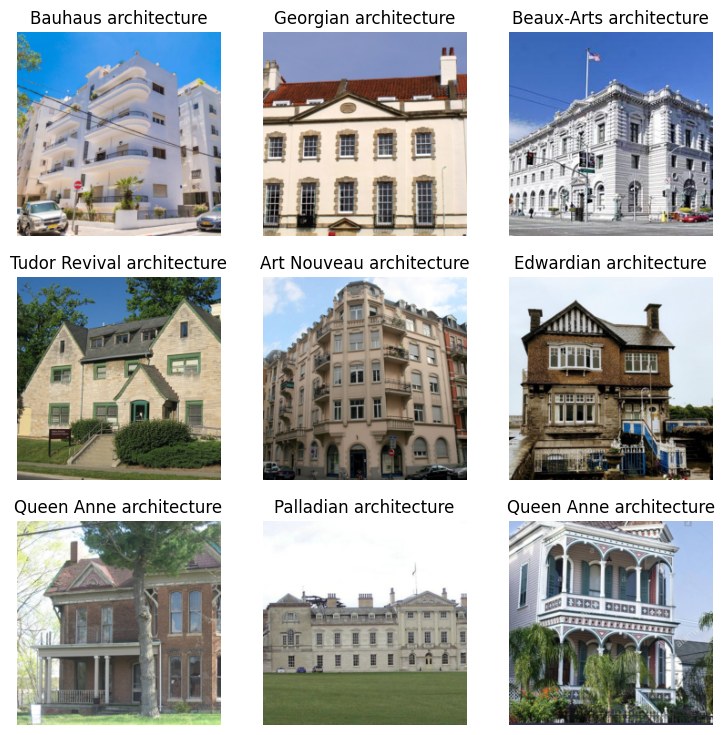

In [ ]:
# Display a batch of images to check data loading

dls.show_batch()

In [ ]:
# Get all the unique labels from the dataset
unique_labels = dls.vocab
print(unique_labels)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [ ]:
# # Note. We can find an optimal learning rate with this

# learn.lr_find()

# # At this point, visually inspect the plot and choose a learning rate where the loss is decreasing the most steeply.

# optimal_lr = ... # Replace with the value you found

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.938303,1.948853,0.566271,01:15


epoch,train_loss,valid_loss,error_rate,time
0,1.939947,1.519501,0.473788,01:13
1,1.526894,1.356710,0.419881,01:14
2,1.106172,1.268445,0.392186,01:13
3,0.779790,1.262952,0.378338,01:15
4,0.580088,1.268052,0.380317,01:16


In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
def helper():

    # plotting the image
    img = PILImage.create(uploader.data[0])
    img.show()

    # predicting the image
    is_style,_,probs = learn.predict(img)

    print(f"The architecture style is {is_style}")

The architecture style is Deconstructivism


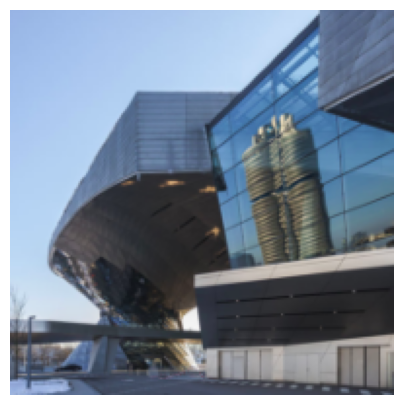

In [ ]:
helper()

In [ ]:
# Insert a search term and grab the first para of wiki to give info about that search term. Can help with identifying the above various archit

!pip install wikipedia
import wikipedia

search_term = "Artificial intelligence"
# i want to add the name of the architecture and get some results on it from wiki

# Search for the Wikipedia page
results = wikipedia.search(search_term)

# Load the first search result
page = wikipedia.page(results[0])

# Extract the first paragraph of the page
first_paragraph = page.content.split("\n")[0]

print(first_paragraph)


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=37bec229b25988b4c57ab64c5e34869f9a9f749d6aadad68cc2c214c8f507779
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
Artificial intelligence (AI) is the ability of machines to perform tasks that are typically associated with human intelligence, such as learning and problem-solving. AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), and competing at the highest level in strategic games (such as chess and Go).Artificial intelligence was founded as an academic discipline in 1956. The field went through multiple cycles of optimism followed by disappointment 